## What is Quantum Computing?

Quantum computing is a type of computation that harnesses the collective properties of quantum states, such as superposition, interference, and entanglement, to perform calculations. Unlike classical computers, which use bits as the smallest unit of data, quantum computers use quantum bits or qubits.

## Basic Quantum Computing Concepts

### Qubits

A qubit is the basic unit of quantum information. Unlike a classical bit, which can be either 0 or 1, a qubit can be in a superposition of both states.


### Superposition

Superposition is the ability of a quantum system to be in multiple states at the same time until it is measured.

### Entanglement

Entanglement is a phenomenon where quantum particles become interconnected and the state of one particle can instantaneously affect the state of another, no matter the distance between them.

Initial state |0⟩:


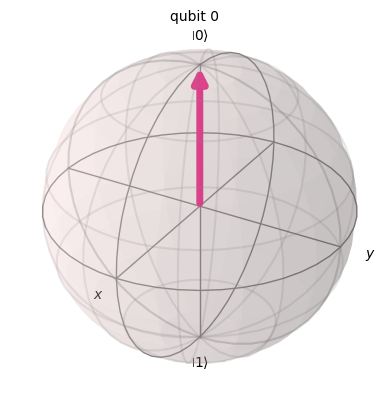

State |1⟩ after applying X gate:


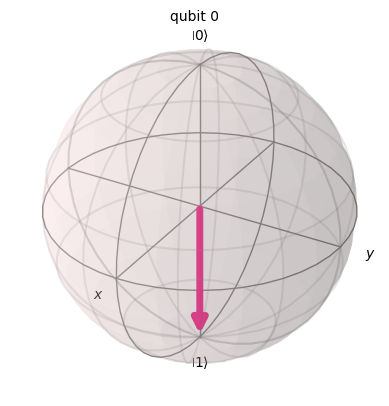

Superposition state (|0⟩ + |1⟩)/√2 after applying H gate:


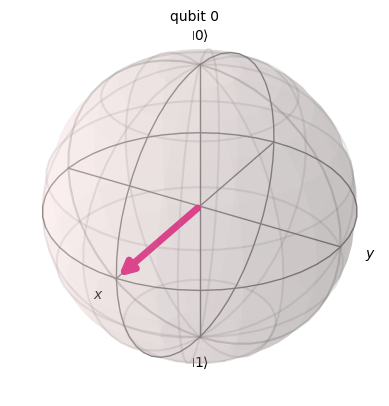

State (|0⟩ + i|1⟩)/√2 after applying H and S gates:


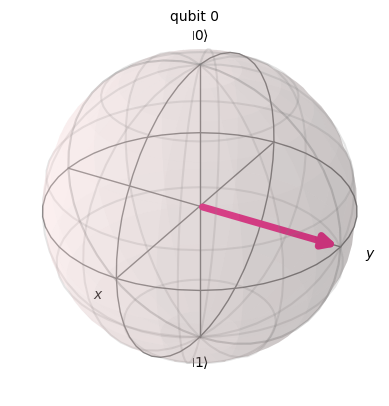

State (|0⟩ + e^(iπ/4)|1⟩)/√2 after applying H and T gates:


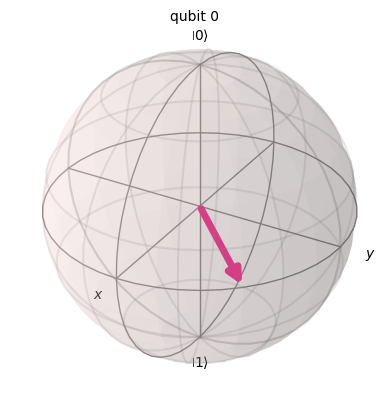

In [15]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Function to visualize a qubit state
def visualize_qubit_state(circuit):
    simulator = StatevectorSimulator()
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit).result()
    statevector = result.get_statevector()
    plot_bloch_multivector(statevector)
    plt.show()

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Visualize the initial state |0⟩
print("Initial state |0⟩:")
visualize_qubit_state(qc)

# Apply X gate to create state |1⟩
qc.x(0)
print("State |1⟩ after applying X gate:")
visualize_qubit_state(qc)

# Reset the circuit
qc = QuantumCircuit(1)

# Apply H gate to create superposition state (|0⟩ + |1⟩)/√2
qc.h(0)
print("Superposition state (|0⟩ + |1⟩)/√2 after applying H gate:")
visualize_qubit_state(qc)

# Reset the circuit
qc = QuantumCircuit(1)

# Apply H and S gates to create state (|0⟩ + i|1⟩)/√2
qc.h(0)
qc.s(0)
print("State (|0⟩ + i|1⟩)/√2 after applying H and S gates:")
visualize_qubit_state(qc)

# Reset the circuit
qc = QuantumCircuit(1)

# Apply H and T gates to create state (|0⟩ + e^(iπ/4)|1⟩)/√2
qc.h(0)
qc.t(0)
print("State (|0⟩ + e^(iπ/4)|1⟩)/√2 after applying H and T gates:")
visualize_qubit_state(qc)

## Example: Quantum Circuit

A quantum circuit is a model for quantum computation in which a computation is a sequence of quantum gates, which are reversible transformations on a quantum mechanical analog of an n-bit register. Quantum circuits are represented by quantum gates acting on qubits, and they are the foundation of quantum algorithms.

### Components of a Quantum Circuit

1. **Qubits**: The basic units of quantum information.
2. **Quantum Gates**: Operations that change the state of qubits.
3. **Measurement**: The process of extracting classical information from qubits.

### Building a Quantum Circuit

To build a quantum circuit, you need to:
1. Initialize the qubits.
2. Apply quantum gates to manipulate the qubits.
3. Measure the qubits to obtain the output.

Quantum circuits can be visualized using circuit diagrams, which show the sequence of gates applied to each qubit.
```

Quantum Circuit


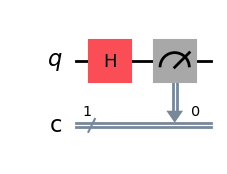

In [26]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a Quantum Circuit with one qubit and one classical bit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate to the qubit to put it in superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Draw the circuit
qc.draw('mpl')
print("Quantum Circuit")


In [17]:
# Use Aer's qasm_simulator
simulator = AerSimulator()

# Execute the circuit on the qasm simulator
job = simulator.run(qc, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)
print("\nTotal count for 0 and 1 are:", counts)


Total count for 0 and 1 are: {'1': 501, '0': 499}


## Interpretation of Quantum Circuit Results

After running a quantum circuit and obtaining the measurement results, it's important to interpret what these results mean. Here, we will discuss how to understand the output of a quantum circuit, particularly focusing on the measurement counts.

### Measurement Results

When we measure a qubit, we collapse its quantum state to one of the basis states, typically |0⟩ or |1⟩. The measurement results are collected over many runs (shots) of the circuit to gather statistics on the outcomes.

### Example Results

Suppose we have the following measurement results after running a quantum circuit 1000 times: Total count for 0 and 1 are: {'1': 507, '0': 493}


### Interpretation

1. **Superposition**:
    - If the circuit includes a Hadamard gate, it puts the qubit in a superposition state. The Hadamard gate transforms the state |0⟩ into an equal superposition of |0⟩ and |1⟩.
    - The measurement results show that the qubit was measured in the state |0⟩ 502 times and in the state |1⟩ 498 times. This close to a 50-50 distribution indicates that the qubit was in an equal superposition state before measurement.

2. **Probabilities**:
    - The counts can be used to estimate the probabilities of each outcome. In this example, the probability of measuring |0⟩ is approximately 502/1000 = 0.502, and the probability of measuring |1⟩ is approximately 498/1000 = 0.498.
    - These probabilities are close to the expected 0.5 for each state in an ideal equal superposition.

3. **Noise and Errors**:
    - In a real quantum computer, noise and errors can affect the results, leading to deviations from the ideal probabilities. In a simulator, the results are ideal unless noise models are explicitly included.
    - The slight difference between the counts for |0⟩ and |1⟩ can be attributed to statistical fluctuations, which are normal in quantum experiments.

The measurement results provide insight into the quantum state of the qubits after applying the quantum gates. By analyzing the counts, we can understand the behavior of the quantum circuit and verify that it performs as expected. This is a fundamental aspect of quantum computing experiments and simulations.

Understanding the interpretation of measurement results is crucial for developing and debugging quantum algorithms, as well as for gaining insights into the underlying quantum phenomena.

## Conclusion

This notebook provided an introduction to quantum computing and demonstrated how to create and run a simple quantum circuit using Qiskit. You should now have a basic understanding of quantum computing concepts such as qubits, superposition, entanglement, and quantum gates. Additionally, you learned how to build a quantum circuit, run it on a simulator, and interpret the measurement results. For more detailed information, please refer to the other notebooks and documentation in this repository.